In [ ]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!ls

evaluation  training  validation


In [ ]:
%cd '/content/drive/MyDrive/Colab_Notebooks/Data/food_packaging/train_test_validate'

/content/drive/MyDrive/Colab_Notebooks/Data/food_packaging/train_test_validate


In [ ]:
!ls

evaluation  training  validation


In [ ]:
%pwd

'/content/drive/MyDrive/Colab_Notebooks/Data/food_packaging/train_test_validate'

In [ ]:
DATA_DIR = '/content/drive/MyDrive/Colab_Notebooks/Data/food_packaging/train_test_validate'

In [ ]:
!ls -l $DATA_DIR

total 12
drwx------ 4 root root 4096 May  1 04:29 evaluation
drwx------ 4 root root 4096 May  1 04:29 training
drwx------ 4 root root 4096 May  1 04:29 validation


In [ ]:
batch_size = 32
img_height = 128
img_width = 128

In [ ]:
# import pathlib
# #data_dir = pathlib.Path('Desktop/Spring22/CV/images_used')
# data_dir = pathlib.Path(data_dir)

In [ ]:
path = DATA_DIR + "/training/food/0.jpg"

In [ ]:
!ls -l $path

-rw------- 1 root root 44899 Nov 30  2019 /content/drive/MyDrive/Colab_Notebooks/Data/food_packaging/train_test_validate/training/food/0.jpg


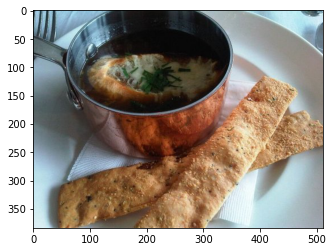

In [ ]:
food = plt.imread(path)
plt.imshow(food)

In [ ]:
training_path = DATA_DIR + '/training/'

In [ ]:
test_path = DATA_DIR + '/evaluation/'

In [ ]:
validation_path = DATA_DIR + '/validation/'

In [ ]:
# Creating a ImageGenerator
train_datagen = ImageDataGenerator(
                    rescale = 1./255)

train_generator = train_datagen.flow_from_directory(directory=training_path,
                                                   target_size=(128,128),
                                                   classes=['food','packaged_food'],
                                                   class_mode='binary')

Found 3000 images belonging to 2 classes.


In [ ]:
# Creating Validation Generator
valid_datagen = ImageDataGenerator(
                    rescale = 1./255)

valid_generator = valid_datagen.flow_from_directory(directory=validation_path,
                                                   target_size=(128,128),
                                                   classes=['food','packaged_food'],
                                                   class_mode='binary')

Found 1000 images belonging to 2 classes.


In [ ]:
# Creating Validation Generator
test_datagen = ImageDataGenerator(
                    rescale = 1./255)

test_generator = valid_datagen.flow_from_directory(directory=test_path,
                                                   batch_size=1,
                                                   target_size=(128,128),
                                                   classes=['food','packaged_food'],
                                                   class_mode='binary')

Found 1000 images belonging to 2 classes.


In [ ]:
num_classes = 2


model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(64,kernel_size=(3,3),input_shape=(128,128,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(256,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512,activation='relu'))
model.add(tf.keras.layers.Dense(1024,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 128)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 128)       0

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(64,kernel_size=(3,3),input_shape=(128,128,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Conv2D(256,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512,activation='relu'))
model.add(tf.keras.layers.Dense(1024,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 63, 63, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 128)      0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 30, 30, 128)      

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
Y = model.fit(train_generator, epochs=5,validation_data=valid_generator)

Epoch 1/5
94/94 [==============================] - 887s 9s/step - loss: 0.7998 - accuracy: 0.6057 - val_loss: 0.5131 - val_accuracy: 0.7710
Epoch 2/5
94/94 [==============================] - 292s 3s/step - loss: 0.5235 - accuracy: 0.7593 - val_loss: 0.4676 - val_accuracy: 0.7850
Epoch 3/5
94/94 [==============================] - 293s 3s/step - loss: 0.4297 - accuracy: 0.8093 - val_loss: 0.3906 - val_accuracy: 0.8390
Epoch 4/5
94/94 [==============================] - 292s 3s/step - loss: 0.3332 - accuracy: 0.8673 - val_loss: 0.2136 - val_accuracy: 0.9280
Epoch 5/5
94/94 [==============================] - 299s 3s/step - loss: 0.2760 - accuracy: 0.8887 - val_loss: 0.2864 - val_accuracy: 0.8920


In [ ]:
model.evaluate(test_generator,steps=len(test_generator))

32/32 [==============================] - 225s 7s/step - loss: 0.3151 - accuracy: 0.8720


[0.315121591091156, 0.871999979019165]

In [ ]:
test_datagen = ImageDataGenerator(
                    rescale = 1./255)

test_generator = valid_datagen.flow_from_directory(directory=test_path,
                                                   batch_size=1,
                                                   target_size=(128,128),
                                                   classes=['food','packaged_food'],
                                                   class_mode='binary')

Found 1000 images belonging to 2 classes.


In [ ]:
misclassified_images = []
correctly_classified = []
for _ in range(1000):
  img, label = test_generator.next()
  y_val_pred = model.predict(img)
  if np.round(y_val_pred) != label:
    misclassified_images.append((img,label))
  else:
    correctly_classified.append((img,label))







In [ ]:
print(len(misclassified_images))
print(len(correctly_classified))

128
872


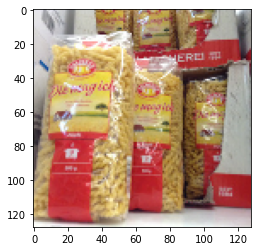

In [ ]:
img,label_mis = misclassified_images[0]
plt.imshow(img[0])
plt.show()

In [ ]:
label_mis

array([1.], dtype=float32)

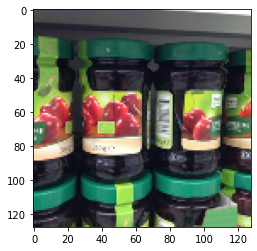

In [ ]:
img,label_correct = correctly_classified[0]
plt.imshow(img[0])
plt.show()

In [ ]:
label_correct

array([1.], dtype=float32)

In [ ]:
img,label_mis = misclassified_images[0]
y_label = model.predict(img)
y_label

array([[0.27137524]], dtype=float32)

In [ ]:
y_label = model.predict(misclassified_images[0])
y_label

array([[0.6336694]], dtype=float32)

In [ ]:
total_misclassified_images = len(misclassified_images)
total_misclassified_images

128

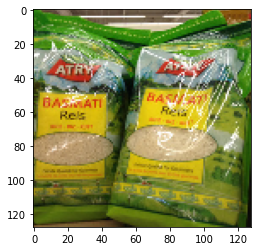

In [ ]:
plt.imshow(misclassified_images[1])
plt.show()

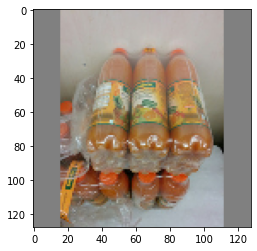

In [ ]:
plt.imshow(misclassified_images[2])
plt.show()

In [ ]:
model3 = tf.keras.Sequential()
model3.add(tf.keras.layers.Conv2D(64,kernel_size=(3,3),input_shape=(128,128,3),activation='relu'))
model3.add(tf.keras.layers.MaxPool2D(2,2))
model3.add(tf.keras.layers.Dropout(0.5))

model3.add(tf.keras.layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model3.add(tf.keras.layers.MaxPool2D(2,2))
model3.add(tf.keras.layers.Dropout(0.5))

model3.add(tf.keras.layers.Conv2D(256,kernel_size=(3,3),activation='relu'))
model3.add(tf.keras.layers.MaxPool2D(2,2))
model3.add(tf.keras.layers.Dropout(0.5))

model3.add(tf.keras.layers.Conv2D(512,kernel_size=(3,3),activation='relu'))
model3.add(tf.keras.layers.MaxPool2D(2,2))
model3.add(tf.keras.layers.Dropout(0.5))

model3.add(tf.keras.layers.Flatten())
model3.add(tf.keras.layers.Dense(512,activation='relu'))
model3.add(tf.keras.layers.Dense(1024,activation='relu'))
model3.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 128)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 128)       0

In [ ]:
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
Y = model3.fit(train_generator, epochs=5,validation_data=valid_generator)

Epoch 1/5
94/94 [==============================] - 527s 6s/step - loss: 0.6930 - accuracy: 0.6040 - val_loss: 0.6244 - val_accuracy: 0.6620
Epoch 2/5
94/94 [==============================] - 17s 183ms/step - loss: 0.5070 - accuracy: 0.7680 - val_loss: 0.4648 - val_accuracy: 0.7910
Epoch 3/5
94/94 [==============================] - 17s 181ms/step - loss: 0.4013 - accuracy: 0.8177 - val_loss: 0.3500 - val_accuracy: 0.8410
Epoch 4/5
94/94 [==============================] - 17s 181ms/step - loss: 0.3288 - accuracy: 0.8630 - val_loss: 0.2459 - val_accuracy: 0.8990
Epoch 5/5
94/94 [==============================] - 17s 186ms/step - loss: 0.2403 - accuracy: 0.9073 - val_loss: 0.2226 - val_accuracy: 0.9270


In [ ]:
model3.evaluate(test_generator,steps=len(test_generator))

1000/1000 [==============================] - 240s 240ms/step - loss: 0.2455 - accuracy: 0.9110


[0.2454516738653183, 0.9110000133514404]

In [ ]:
Y = model3.fit(train_generator, epochs=10,validation_data=valid_generator)

Epoch 1/10
94/94 [==============================] - 18s 188ms/step - loss: 0.2117 - accuracy: 0.9203 - val_loss: 0.1837 - val_accuracy: 0.9310
Epoch 2/10
94/94 [==============================] - 17s 182ms/step - loss: 0.1661 - accuracy: 0.9337 - val_loss: 0.1525 - val_accuracy: 0.9450
Epoch 3/10
94/94 [==============================] - 17s 181ms/step - loss: 0.1358 - accuracy: 0.9460 - val_loss: 0.1797 - val_accuracy: 0.9310
Epoch 4/10
94/94 [==============================] - 17s 183ms/step - loss: 0.1490 - accuracy: 0.9410 - val_loss: 0.1053 - val_accuracy: 0.9630
Epoch 5/10
94/94 [==============================] - 17s 181ms/step - loss: 0.1003 - accuracy: 0.9630 - val_loss: 0.0802 - val_accuracy: 0.9750
Epoch 6/10
94/94 [==============================] - 17s 182ms/step - loss: 0.0897 - accuracy: 0.9640 - val_loss: 0.1510 - val_accuracy: 0.9460
Epoch 7/10
94/94 [==============================] - 17s 182ms/step - loss: 0.0956 - accuracy: 0.9630 - val_loss: 0.1324 - val_accuracy: 0.9510

In [ ]:
model3.evaluate(test_generator,steps=len(test_generator))

1000/1000 [==============================] - 9s 9ms/step - loss: 0.0885 - accuracy: 0.9680


[0.08847354352474213, 0.9679999947547913]

In [ ]:
num_classes = 2
model4 = tf.keras.Sequential()
model4.add(tf.keras.layers.Conv2D(64,kernel_size=(3,3),input_shape=(128,128,3),activation='relu'))
model4.add(tf.keras.layers.MaxPool2D(2,2))
model4.add(tf.keras.layers.Dropout(0.5))

model4.add(tf.keras.layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model4.add(tf.keras.layers.MaxPool2D(2,2))
model4.add(tf.keras.layers.Dropout(0.5))

model4.add(tf.keras.layers.Conv2D(256,kernel_size=(3,3),activation='relu'))
model4.add(tf.keras.layers.MaxPool2D(2,2))
model4.add(tf.keras.layers.Dropout(0.5))

model4.add(tf.keras.layers.Conv2D(512,kernel_size=(3,3),activation='relu'))
model4.add(tf.keras.layers.MaxPool2D(2,2))
model4.add(tf.keras.layers.Dropout(0.5))

model4.add(tf.keras.layers.Flatten())
model4.add(tf.keras.layers.Dense(512,activation='relu'))
model4.add(tf.keras.layers.Dense(1024,activation='relu'))
model4.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
Y = model4.fit(train_generator, epochs=20,validation_data=valid_generator)

Epoch 1/20
94/94 [==============================] - 18s 183ms/step - loss: 0.7086 - accuracy: 0.6177 - val_loss: 0.6227 - val_accuracy: 0.6700
Epoch 2/20
94/94 [==============================] - 17s 180ms/step - loss: 0.4940 - accuracy: 0.7697 - val_loss: 0.4641 - val_accuracy: 0.7910
Epoch 3/20
94/94 [==============================] - 17s 183ms/step - loss: 0.4202 - accuracy: 0.8063 - val_loss: 0.3935 - val_accuracy: 0.8280
Epoch 4/20
94/94 [==============================] - 17s 182ms/step - loss: 0.3616 - accuracy: 0.8433 - val_loss: 0.3420 - val_accuracy: 0.8560
Epoch 5/20
94/94 [==============================] - 17s 181ms/step - loss: 0.3124 - accuracy: 0.8707 - val_loss: 0.2499 - val_accuracy: 0.9060
Epoch 6/20
94/94 [==============================] - 17s 182ms/step - loss: 0.2447 - accuracy: 0.9023 - val_loss: 0.3745 - val_accuracy: 0.8260
Epoch 7/20
94/94 [==============================] - 17s 181ms/step - loss: 0.1967 - accuracy: 0.9240 - val_loss: 0.1815 - val_accuracy: 0.9360

In [ ]:
model4.evaluate(test_generator,steps=len(test_generator))

1000/1000 [==============================] - 10s 10ms/step - loss: 0.0995 - accuracy: 0.9670


[0.09952744841575623, 0.9670000076293945]

In [ ]:
##combining early stopping with the same model.

In [ ]:
num_classes = 2
model5 = tf.keras.Sequential()
model5.add(tf.keras.layers.Conv2D(64,kernel_size=(3,3),input_shape=(128,128,3),activation='relu'))
model5.add(tf.keras.layers.MaxPool2D(2,2))
model5.add(tf.keras.layers.Dropout(0.5))

model5.add(tf.keras.layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model5.add(tf.keras.layers.MaxPool2D(2,2))
model5.add(tf.keras.layers.Dropout(0.5))

model5.add(tf.keras.layers.Conv2D(256,kernel_size=(3,3),activation='relu'))
model5.add(tf.keras.layers.MaxPool2D(2,2))
model5.add(tf.keras.layers.Dropout(0.5))

model5.add(tf.keras.layers.Conv2D(512,kernel_size=(3,3),activation='relu'))
model5.add(tf.keras.layers.MaxPool2D(2,2))
model5.add(tf.keras.layers.Dropout(0.5))

model5.add(tf.keras.layers.Flatten())
model5.add(tf.keras.layers.Dense(512,activation='relu'))
model5.add(tf.keras.layers.Dense(1024,activation='relu'))
model5.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
model5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_accuracy', patience=15, mode='max')

In [ ]:
history = model5.fit(train_generator, epochs=50,validation_data=valid_generator, callbacks=[early_stopping])

Epoch 1/50
94/94 [==============================] - 18s 187ms/step - loss: 0.7529 - accuracy: 0.5203 - val_loss: 0.6888 - val_accuracy: 0.5270
Epoch 2/50
94/94 [==============================] - 17s 185ms/step - loss: 0.5858 - accuracy: 0.6933 - val_loss: 0.4930 - val_accuracy: 0.7830
Epoch 3/50
94/94 [==============================] - 17s 182ms/step - loss: 0.4860 - accuracy: 0.7767 - val_loss: 0.4274 - val_accuracy: 0.8030
Epoch 4/50
94/94 [==============================] - 17s 182ms/step - loss: 0.3987 - accuracy: 0.8290 - val_loss: 0.3453 - val_accuracy: 0.8470
Epoch 5/50
94/94 [==============================] - 17s 181ms/step - loss: 0.3484 - accuracy: 0.8590 - val_loss: 0.3142 - val_accuracy: 0.8650
Epoch 6/50
94/94 [==============================] - 17s 180ms/step - loss: 0.2973 - accuracy: 0.8787 - val_loss: 0.2257 - val_accuracy: 0.9100
Epoch 7/50
94/94 [==============================] - 17s 181ms/step - loss: 0.2752 - accuracy: 0.8817 - val_loss: 0.3294 - val_accuracy: 0.8580

In [ ]:
model5.evaluate(test_generator,steps=len(test_generator))

1000/1000 [==============================] - 9s 9ms/step - loss: 0.0948 - accuracy: 0.9650


[0.09475579857826233, 0.9649999737739563]

In [ ]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

cudnn.benchmark = True
plt.ion()   # interactive mode

In [ ]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'training': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'validation': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = '/content/drive/MyDrive/Colab_Notebooks/Data/food_packaging/train_test_validate'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['training', 'validation']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['training', 'validation']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['training', 'validation']}
class_names = image_datasets['training'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


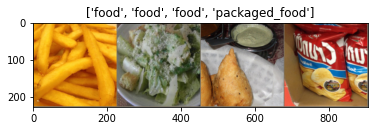

In [ ]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['training']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['training', 'validation']:
            if phase == 'training':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'training'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'training':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'training':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # deep copy the model
            if phase == 'validation' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:4f}')

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [ ]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['validation']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[j]]}')
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

In [ ]:
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [ ]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=25)

Epoch 0/24
----------


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


training Loss: 0.3213 Acc: 0.8773
validation Loss: 0.1930 Acc: 0.9320

Epoch 1/24
----------
training Loss: 0.3025 Acc: 0.9043
validation Loss: 0.0555 Acc: 0.9830

Epoch 2/24
----------
training Loss: 0.3072 Acc: 0.9010
validation Loss: 0.0266 Acc: 0.9960

Epoch 3/24
----------
training Loss: 0.2588 Acc: 0.9217
validation Loss: 0.0439 Acc: 0.9880

Epoch 4/24
----------
training Loss: 0.2861 Acc: 0.9043
validation Loss: 0.0190 Acc: 0.9960

Epoch 5/24
----------
training Loss: 0.2096 Acc: 0.9317
validation Loss: 0.0263 Acc: 0.9960

Epoch 6/24
----------
training Loss: 0.1456 Acc: 0.9500
validation Loss: 0.0265 Acc: 0.9910

Epoch 7/24
----------
training Loss: 0.0765 Acc: 0.9733
validation Loss: 0.0214 Acc: 0.9960

Epoch 8/24
----------
training Loss: 0.0560 Acc: 0.9843
validation Loss: 0.0232 Acc: 0.9940

Epoch 9/24
----------
training Loss: 0.0571 Acc: 0.9833
validation Loss: 0.0153 Acc: 0.9970

Epoch 10/24
----------
training Loss: 0.0430 Acc: 0.9887
validation Loss: 0.0123 Acc: 0.9970

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


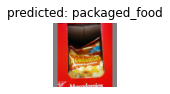

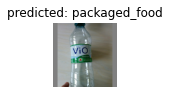

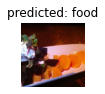

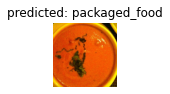

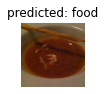

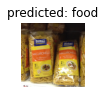

In [ ]:
visualize_model(model_ft)

In [ ]:
data_transforms = {
    'training': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}

In [ ]:
data_dir = '/content/drive/MyDrive/Colab_Notebooks/Data/food_packaging/train_test_validate'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['evaluation']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['evaluation']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['evaluation']}
class_names = image_datasets['evaluation'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
model_ft = models.alexnet(pretrained=True)
#num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
#model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [ ]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=25)

Epoch 0/24
----------


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


training Loss: 1.2282 Acc: 0.7950
validation Loss: 0.0762 Acc: 0.9740

Epoch 1/24
----------
training Loss: 0.1775 Acc: 0.9420
validation Loss: 0.2301 Acc: 0.9270

Epoch 2/24
----------
training Loss: 0.1400 Acc: 0.9533
validation Loss: 0.0739 Acc: 0.9830

Epoch 3/24
----------
training Loss: 0.1171 Acc: 0.9613
validation Loss: 0.1086 Acc: 0.9580

Epoch 4/24
----------
training Loss: 0.1139 Acc: 0.9613
validation Loss: 0.1103 Acc: 0.9580

Epoch 5/24
----------
training Loss: 0.0898 Acc: 0.9643
validation Loss: 0.0621 Acc: 0.9800

Epoch 6/24
----------
training Loss: 0.0826 Acc: 0.9730
validation Loss: 0.0779 Acc: 0.9750

Epoch 7/24
----------
training Loss: 0.0447 Acc: 0.9830
validation Loss: 0.0416 Acc: 0.9900

Epoch 8/24
----------
training Loss: 0.0443 Acc: 0.9863
validation Loss: 0.0433 Acc: 0.9860

Epoch 9/24
----------
training Loss: 0.0357 Acc: 0.9857
validation Loss: 0.0421 Acc: 0.9860

Epoch 10/24
----------
training Loss: 0.0394 Acc: 0.9857
validation Loss: 0.0404 Acc: 0.9860